In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# WHO Life Expectancy Data Analysis

- will include short description of all variables
- can include some questions we have that leads to analysis
- final question

## Data Cleaning 
- use of interpolation to fill null data and dropping columns that has large proportion of NULL

In [3]:
df = pd.read_csv('who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

In [5]:
df.isna().sum()

country               0
country_code          0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol              50
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           569
measles              19
polio                19
diphtheria           19
basic_water          32
doctors            1331
hospitals          2981
gni_capita          682
gghe-d              100
che_gdp             117
une_pop              37
une_infant            0
une_life              0
une_hiv             741
une_gni             117
une_poverty        2198
une_edu_spend      1286
une_literacy       2540
une_school         2306
dtype: int64

We decided to drop the UNESCO datasets because there are overlapping predictors with the predictors in GHO datasets. Another reason we choose GHO datasets over UNESCO datasets is because some of them variables in UNESCO has more than 70% null data, eg une_poverty, une_edu_spend, une_literacy, une_school. However, we retained une_pop and une_hiv because these two variables are not found in GHO datasets.


In [6]:
df.drop(['une_infant', 'une_life', 'une_gni', 'une_poverty', 'une_edu_spend', 'une_literacy', 'une_school'], 
        axis = 1, inplace = True)

We decided to drop 'hospital' column because there is 96% of missing values in that column. 
We also dropped 'country code' column because 'country' column itself is enough for reference.

In [7]:
df.drop(['hospitals'], axis = 1, inplace = True)
df.drop(['country_code'], axis = 1, inplace =True)

In [8]:
mortality = pd.DataFrame(df[['adult_mortality', 'infant_mort', 'age1-4mort']])
mortality.head()

,adult_mortality,infant_mort,age1-4mort
0,383.5583,0.137985,0.025695
1,372.3876,0.133675,0.024500
2,354.5147,0.128320,0.023260
3,343.2169,0.122040,0.021925
4,333.8711,0.115700,0.020545


The values of adult mortality are rate per 1000 populations thus we convert it into the same format as the other two mortality rate in order to ease the EDA.

In [9]:
for i in range(0, 3111):
    val = df.iloc[i]['adult_mortality']
    adjusted_val = val/1000 
    df.at[i, 'adult_mortality'] = adjusted_val


In [10]:
df.rename(columns = {'adult_mortality':'adult_mort_rate', 'infant_mort':'infant_mort_rate', 'age1-4mort':'age1-4_mort_rate'}, 
          inplace = True)


In [11]:
df.isna().sum()

country                0
region                 0
year                   0
life_expect            0
life_exp60             0
adult_mort_rate        0
infant_mort_rate       0
age1-4_mort_rate       0
alcohol               50
bmi                   34
age5-19thinness       34
age5-19obesity        34
hepatitis            569
measles               19
polio                 19
diphtheria            19
basic_water           32
doctors             1331
gni_capita           682
gghe-d               100
che_gdp              117
une_pop               37
une_hiv              741
dtype: int64

## Checking missing values under 'alcohol' column

In [12]:
df[df['alcohol'].isna()]['country'].value_counts()

South Sudan    17
Sudan          11
Serbia          6
Montenegro      6
Canada          5
Afghanistan     5
Name: country, dtype: int64

In [13]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])
sudan_df[['year','alcohol']]

,year,alcohol
1598,2000,NaN
1599,2001,NaN
1600,2002,NaN
1601,2003,NaN
1602,2004,NaN
1603,2005,NaN
1604,2006,NaN
1605,2007,NaN
1606,2008,NaN
1607,2009,NaN


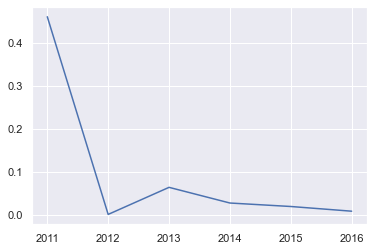

In [14]:
plt.plot('year', 'alcohol', data = sudan_df)

In [15]:
sudan_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

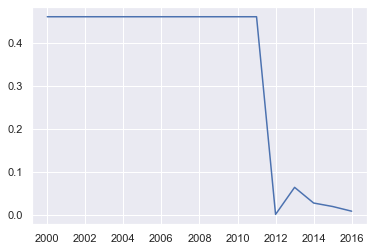

In [16]:
plt.plot('year', 'alcohol', data = sudan_df)

In [17]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])

In [18]:
sudan_df.bfill(inplace = True)

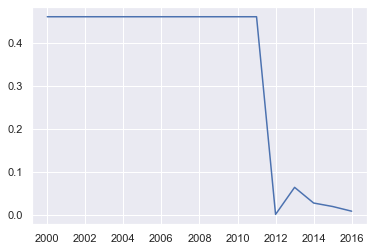

In [19]:
plt.plot('year', 'alcohol', data = sudan_df) 

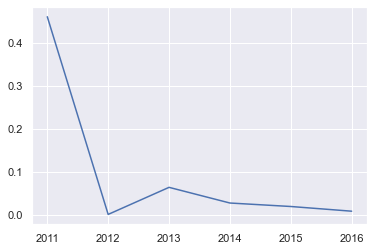

In [20]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])
sudan_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = sudan_df)

In [21]:
canada_df = pd.DataFrame(df[df['country'] == 'Canada'])
canada_df[['year','alcohol']]

,year,alcohol
1309,2000,NaN
1310,2001,NaN
1311,2002,NaN
1312,2003,NaN
1313,2004,NaN
1314,2005,8.0
1315,2006,8.2
1316,2007,8.3
1317,2008,8.4
1318,2009,8.4


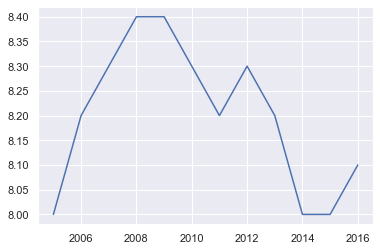

In [22]:
plt.plot('year', 'alcohol', data = canada_df)

In [23]:
canada_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

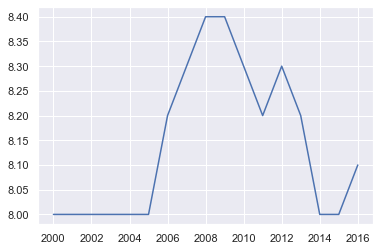

In [24]:
plt.plot('year', 'alcohol', data = canada_df)

In [25]:
canada_df = pd.DataFrame(df[df['country'] == 'Canada'])

In [26]:
canada_df.ffill(inplace = True)

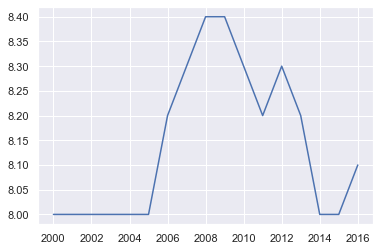

In [27]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)

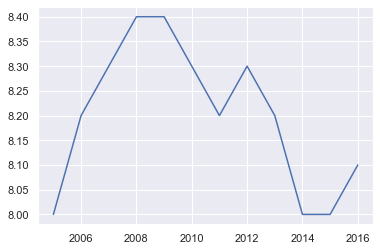

In [28]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)


In [29]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df[['year','alcohol']]

,year,alcohol
1360,2000,NaN
1361,2001,NaN
1362,2002,NaN
1363,2003,NaN
1364,2004,NaN
1365,2005,0.01623
1366,2006,0.02618
1367,2007,0.01801
1368,2008,0.02756
1369,2009,0.00972


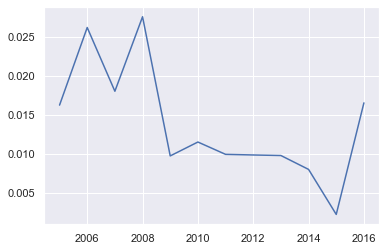

In [30]:
plt.plot('year', 'alcohol', data = afg_df)

In [31]:
afg_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

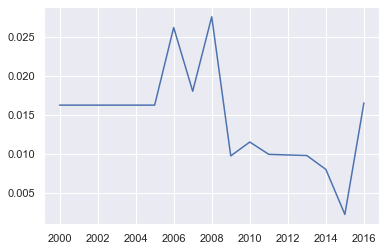

In [32]:
plt.plot('year', 'alcohol', data = afg_df)

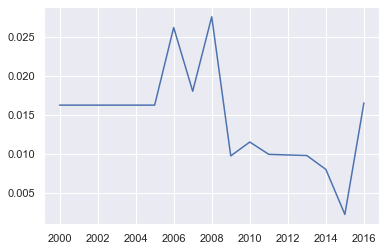

In [33]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

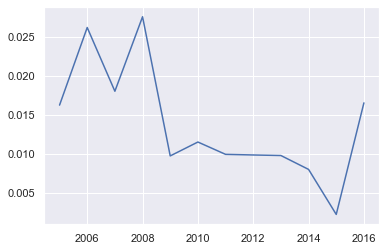

In [34]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

Analysis : It is obvious that no trend can be observed from the above plot as the years given to observe the trend of the data are too few and also the missing values are usually appear to be missing in consecutive years. In addition to this, we realisedt that forward filling is not working in this case and this indicates that backward filling might also not working for other cases. Thus, interpolation with linear method and both directin will be the better method to fill in the missing values as it is able to fill in missing values which appears to be in the recent years or in the earliest year. Furthermore, if the missing values are more than 10 for a country, we tend not to fill in the null values as too few of available datas to be used as reference for filling in the missing values and might contribute to low accuracy. 

In [35]:
#ask
countries = df[df['alcohol'].isna()]['country'].unique().tolist()

In [36]:
for country in countries:
    if len(df[df['alcohol'].isna()][df['country'] == country]) > 10:
        pass
    else:
        row_index = df[df['country'] == country].index
        col_index = df.columns.get_loc('alcohol')
        alcohol_df = pd.DataFrame(df.iloc[row_index, col_index])
        alcohol_df.interpolate(method = 'linear', limit_direction = 'both', inplace = True)
        df.iloc[row_index, col_index] = alcohol_df

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_19492/3723828569.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df['alcohol'].isna()][df['country'] == country]) > 10:


In [37]:
df.isna().sum()

country                0
region                 0
year                   0
life_expect            0
life_exp60             0
adult_mort_rate        0
infant_mort_rate       0
age1-4_mort_rate       0
alcohol               28
bmi                   34
age5-19thinness       34
age5-19obesity        34
hepatitis            569
measles               19
polio                 19
diphtheria            19
basic_water           32
doctors             1331
gni_capita           682
gghe-d               100
che_gdp              117
une_pop               37
une_hiv              741
dtype: int64

## Define a method to fill the null values with the condition that if missing values for one country are more than 10 then the null values will be retained

In [38]:
def fill_na(pred, country):
    if len(df[df[pred].isna()][df['country'] == country]) > 10:
        pass
    else:
        row_index = df[df['country'] == country].index
        col_index = df.columns.get_loc(pred)
        pred_df = pd.DataFrame(df.iloc[row_index, col_index])
        pred_df.interpolate(method = 'linear', limit_direction = 'both', inplace = True)
        df.iloc[row_index, col_index] = pred_df

In [39]:
df[df['bmi'].isna()]['country'].value_counts()

South Sudan    17
Sudan          17
Name: country, dtype: int64

In [40]:
df[df['age5-19thinness'].isna()]['country'].value_counts()

South Sudan    17
Sudan          17
Name: country, dtype: int64

In [41]:
df[df['age5-19obesity'].isna()]['country'].value_counts()

South Sudan    17
Sudan          17
Name: country, dtype: int64

To check if the fill_na method works well on other datasets as well.

In [42]:
df[df['hepatitis'].isna()]['country'].value_counts()

Slovenia                                                17
United Kingdom of Great Britain and Northern Ireland    17
Switzerland                                             17
Japan                                                   17
Finland                                                 17
                                                        ..
Guyana                                                   1
Barbados                                                 1
Australia                                                1
Russian Federation                                       1
Grenada                                                  1
Name: country, Length: 99, dtype: int64

In [43]:
aus_df = pd.DataFrame(df[df['country'] == 'Australia'])

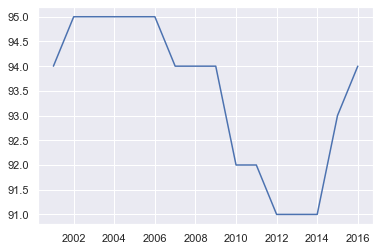

In [44]:
plt.plot('year', 'hepatitis', data = aus_df)

In [45]:
aus_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

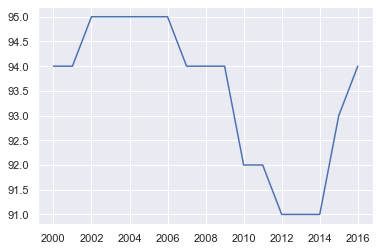

In [46]:
plt.plot('year', 'hepatitis', data = aus_df)

In [47]:
pnm_df = pd.DataFrame(df[df['country'] == 'Panama'])

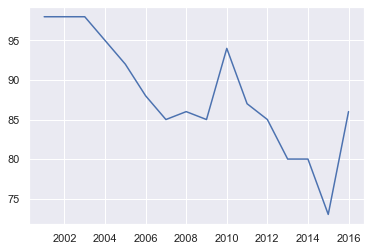

In [48]:
plt.plot('year', 'hepatitis', data = pnm_df)

In [49]:
pnm_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

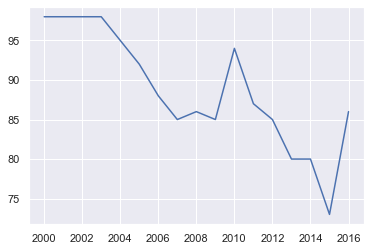

In [50]:
plt.plot('year', 'hepatitis', data = pnm_df)

Conclusion : The fill_na method can be used thus we will just generate a list of variables with null value and fill in the null values if condition is met

In [51]:
countries = df[df['hepatitis'].isna()]['country'].unique().tolist()

In [52]:
for country in countries:
    fill_na('hepatitis', country)

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_19492/438080508.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df[pred].isna()][df['country'] == country]) > 10:


In [53]:
null_pred = df.columns[df.isna().any()].tolist()
null_pred.remove('alcohol')
null_pred.remove('bmi')
null_pred.remove('age5-19thinness')
null_pred.remove('age5-19obesity')
null_pred.remove('hepatitis')

In [54]:
null_pred

['measles',
 'polio',
 'diphtheria',
 'basic_water',
 'doctors',
 'gni_capita',
 'gghe-d',
 'che_gdp',
 'une_pop',
 'une_hiv']

In [55]:
for pred in null_pred:
    countries = df[df[pred].isna()]['country'].unique().tolist()
    for country in countries:
        fill_na(pred, country)

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_19492/438080508.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df[pred].isna()][df['country'] == country]) > 10:


In [56]:
df.isna().sum()

country               0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mort_rate       0
infant_mort_rate      0
age1-4_mort_rate      0
alcohol              28
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           230
measles              11
polio                11
diphtheria           11
basic_water          11
doctors             895
gni_capita          107
gghe-d               68
che_gdp              85
une_pop              31
une_hiv             731
dtype: int64

# EDA for categorical variables (region, country)

In [243]:
#can we predict country with life expectancy????????????

print(df["region"].value_counts())


Europe                   850
Africa                   799
Americas                 561
Eastern Mediterranean    357
Western Pacific          357
South-East Asia          187
Name: region, dtype: int64


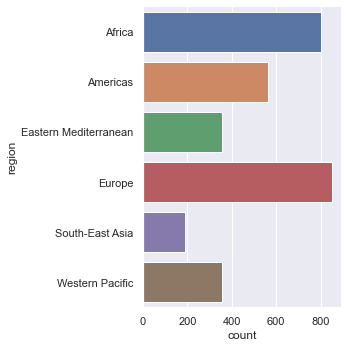

In [244]:
sb.catplot(y = "region", data = df, kind = "count")

<AxesSubplot:xlabel='life_expect', ylabel='region'>

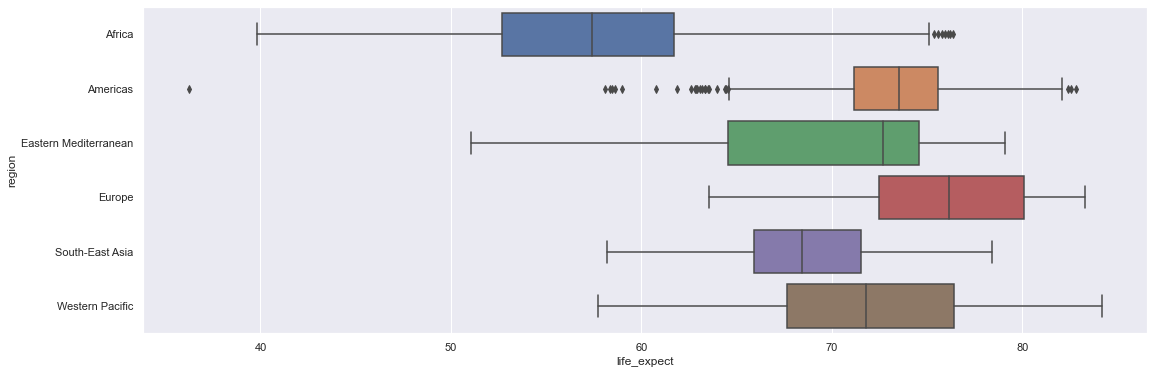

In [246]:
regionDF = pd.concat([df['region'], df['life_expect']], axis = 1).reindex(df['region'].index)

f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "life_expect", y = "region", data = regionDF, orient = "h")


Insights: Region appears to be able to predict life expectancy as each box-plot seems to be distinct from another.
Has distinct distribution among the different regions.


# Machine Learning
1) Multiple Linear Regression
2) RandomForestRegressor

## Preparing and standardising train and test datasets for machine learning

In [141]:
ml_df = pd.DataFrame(df.drop([ 'year', 'country', 'region'], axis=1))

#1)dropping the whole row if any null - ensure same number of data for each predictor
clean_ml_df = ml_df.dropna()
clean_ml_df



,life_expect,life_exp60,adult_mort_rate,infant_mort_rate,age1-4_mort_rate,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,gni_capita,gghe-d,che_gdp,une_pop,une_hiv
4,51.52863,15.56860,0.333871,0.115700,0.020545,2.41274,22.2,10.3,0.8,43.0,43.0,18.0,47.0,45.35134,0.621,3080.0,1.68663,3.96720,18758.145,1.3
9,57.29004,16.48146,0.281049,0.084800,0.013310,6.11778,22.7,9.4,1.3,47.0,46.0,36.0,50.0,49.57516,1.313,6200.0,2.60046,3.84261,22514.281,1.7
17,51.43743,15.71862,0.369974,0.103510,0.017145,7.17131,20.6,9.1,0.3,83.0,72.0,71.0,80.0,50.66312,0.280,580.0,1.46507,6.17697,6378.871,3.3
18,52.03133,15.77446,0.365476,0.100855,0.016470,6.62197,20.7,8.9,0.4,83.0,73.0,72.0,81.0,51.23447,0.280,580.0,1.69244,6.40484,6525.545,3.1
19,52.27760,15.80661,0.369024,0.097855,0.015735,6.51436,20.8,8.8,0.4,83.0,75.0,74.0,81.0,51.80933,0.280,590.0,1.53550,6.47216,6704.113,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,64.49448,16.57977,0.209267,0.055840,0.004845,6.29833,22.4,9.2,3.1,79.0,72.0,78.0,79.0,72.07056,1.800,4170.0,0.43670,2.07638,6444.530,0.3
3107,64.79716,16.64219,0.205146,0.055350,0.004600,6.42186,22.6,9.1,3.5,87.0,82.0,86.0,87.0,74.05544,4.493,4570.0,0.71266,2.39985,6541.304,0.3
3108,65.10757,16.70787,0.200820,0.054585,0.004405,6.64447,22.7,9.0,3.8,88.0,87.0,88.0,88.0,76.02924,4.949,4570.0,0.68373,2.29846,6639.756,0.3
3109,65.45008,16.77074,0.196661,0.053465,0.004160,6.83826,22.8,8.9,4.2,81.0,83.0,80.0,81.0,77.99142,4.949,4570.0,0.86391,2.45366,6741.164,0.3


Insights:
Will take life_expect and life_exp60 as response variables for machine learning and compare to see if there is any difference

Obvious that life_exp60 will be most highly correlated with life_expect (maybe EDA will show the same result also need check) + both have similar derivations

In [142]:
#creating Train and Test datasets for Regression
from sklearn.model_selection import train_test_split

y_le = pd.DataFrame(clean_ml_df['life_expect'])
y_le60 = pd.DataFrame(clean_ml_df['life_exp60'])
X = pd.DataFrame(clean_ml_df.drop(['life_expect', 'life_exp60'], axis=1))

#ensuring same splits for comparison after machine learning
X_train, X_test, y_train_le, y_test_le = train_test_split(X, y_le, test_size = 0.25, random_state = 0)
X_train, X_test, y_train_le60, y_test_le60 = train_test_split(X, y_le60, test_size = 0.25, random_state = 0)

print("Train Set for y=life_expect:", y_train_le.shape, X_train.shape)
print("Test Set for y=life_expect:", y_test_le.shape, X_test.shape)
print()
print("Train Set for y=life_exp60:", y_train_le60.shape, X_train.shape)
print("Test Set for y=life_exp60:", y_test_le60.shape, X_test.shape)

Train Set for y=life_expect: (1091, 1) (1091, 18)
Test Set for y=life_expect: (364, 1) (364, 18)

Train Set for y=life_exp60: (1091, 1) (1091, 18)
Test Set for y=life_exp60: (364, 1) (364, 18)


## Model 1: Multi-Variate Regression
https://blog.minitab.com/en/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables
https://www.analyticsvidhya.com/blog/2021/10/guide-to-deal-with-missing-values/

### Analysing response = life_expect dataset

In [143]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train_le) 

print('Intercept of Regression: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors in order of decreasing abs(coefficients)
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key = abs)



Intercept of Regression: b =  [86.97123109]



,Predictors,Coefficients
2,age1-4_mort_rate,-2.960525e+02
1,infant_mort_rate,-6.752415e+01
0,adult_mort_rate,-4.440309e+01
4,bmi,-4.108385e-01
14,gghe-d,3.406579e-01
6,age5-19obesity,1.791326e-01
15,che_gdp,6.428365e-02
5,age5-19thinness,-5.750305e-02
17,une_hiv,5.492751e-02
3,alcohol,5.058465e-02


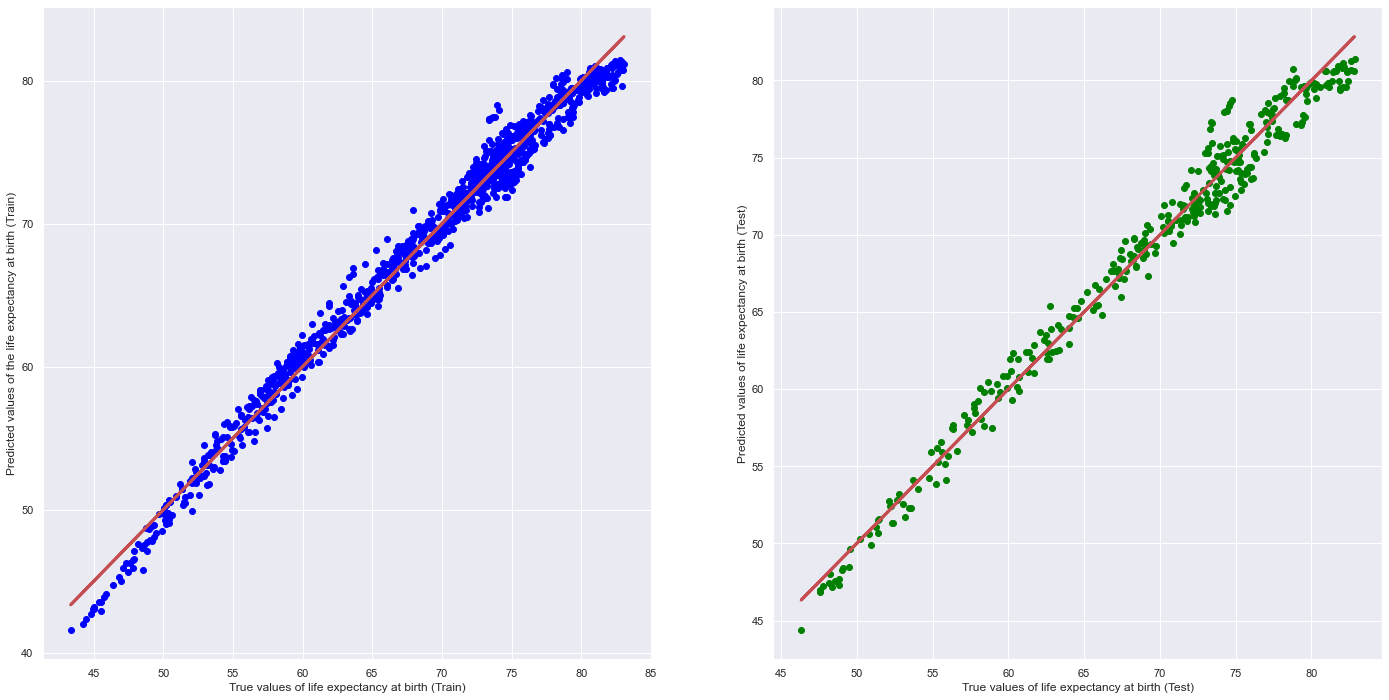

In [144]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le, y_train_pred, color = "blue")
axes[0].plot(y_train_le, y_train_le, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at birth (Train)")
axes[0].set_ylabel("Predicted values of the life expectancy at birth (Train)")
axes[1].scatter(y_test_le, y_test_pred, color = "green")
axes[1].plot(y_test_le, y_test_le, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at birth (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at birth (Test)")
plt.show()



In [145]:
from sklearn.metrics import mean_squared_error

print("-----------For Response = life_expect-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

-----------For Response = life_expect-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9851732319029329
Mean Squared Error (MSE) 	: 1.2702526542638435

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9806057180344571
Mean Squared Error (MSE) 	: 1.6219049755915118



### Analysing response = life_exp60 dataset

In [146]:


linreg = LinearRegression()
linreg.fit(X_train, y_train_le60) 

print('Intercept of Regression: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors in order of decreasing abs(coefficients)
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key = abs)



Intercept of Regression: b =  [33.15403197]



,Predictors,Coefficients
2,age1-4_mort_rate,-3.967966e+01
0,adult_mort_rate,-1.447143e+01
1,infant_mort_rate,-8.277555e+00
4,bmi,-5.627833e-01
14,gghe-d,4.046364e-01
6,age5-19obesity,2.144973e-01
17,une_hiv,1.074838e-01
5,age5-19thinness,-9.457784e-02
15,che_gdp,5.215257e-02
3,alcohol,2.760733e-02


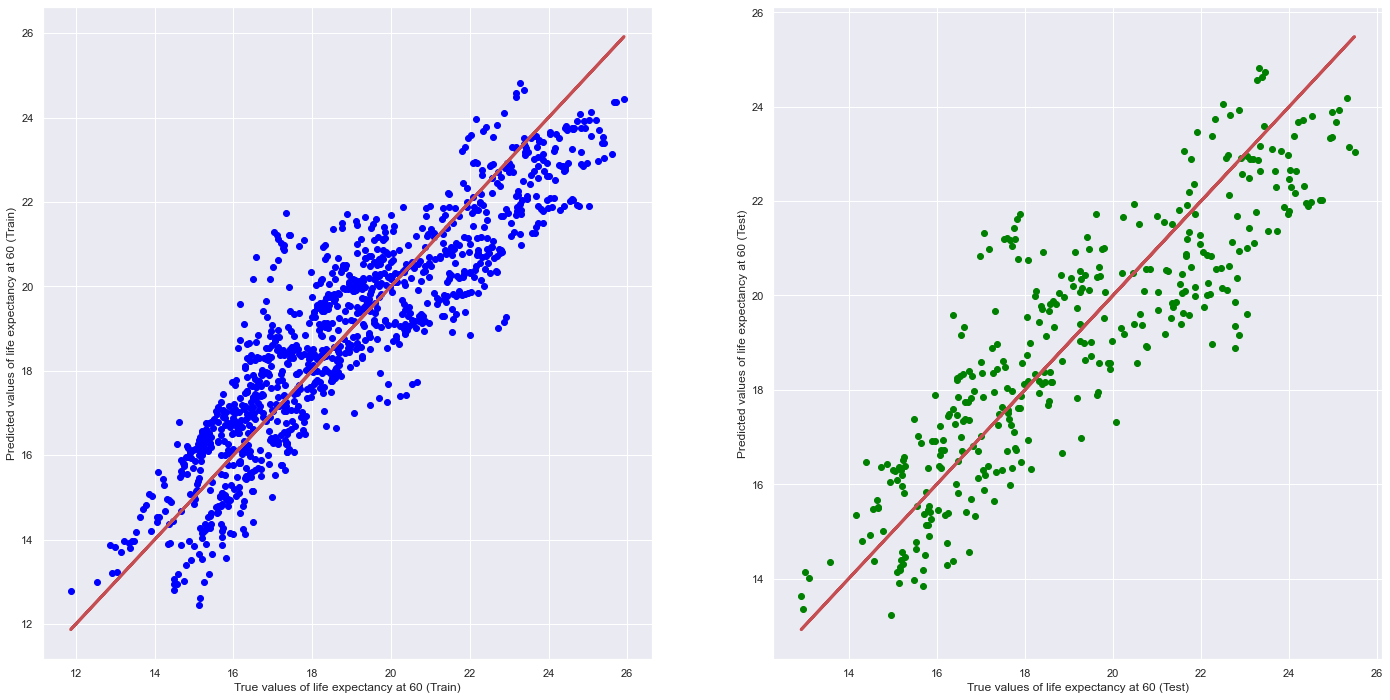

----------For Response = life_exp60----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8038527861916556
Mean Squared Error (MSE) 	: 1.6785358440865321

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7587609823245771
Mean Squared Error (MSE) 	: 2.2087642540601253



In [147]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le60, y_train_pred, color = "blue")
axes[0].plot(y_train_le60, y_train_le60, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at 60 (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at 60 (Train)")
axes[1].scatter(y_test_le60, y_test_pred, color = "green")
axes[1].plot(y_test_le60, y_test_le60, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at 60 (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at 60 (Test)")
plt.show()


print("----------For Response = life_exp60----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le60, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le60, y_test_pred))
print()

### Analysing with only top 3 predictors

In [148]:
y = pd.DataFrame(clean_ml_df['life_expect'])
X = pd.DataFrame(clean_ml_df[['age1-4_mort_rate','adult_mort_rate','infant_mort_rate']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

linreg = LinearRegression()  
linreg.fit(X_train, y_train) 

print()
print('Intercept of Regression: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key=abs)

Train Set : (1091, 1) (1091, 3)
Test Set  : (364, 1) (364, 3)

Intercept of Regression: b =  [82.23140887]



,Predictors,Coefficients
0,age1-4_mort_rate,-181.162589
2,infant_mort_rate,-121.999678
1,adult_mort_rate,-43.901281


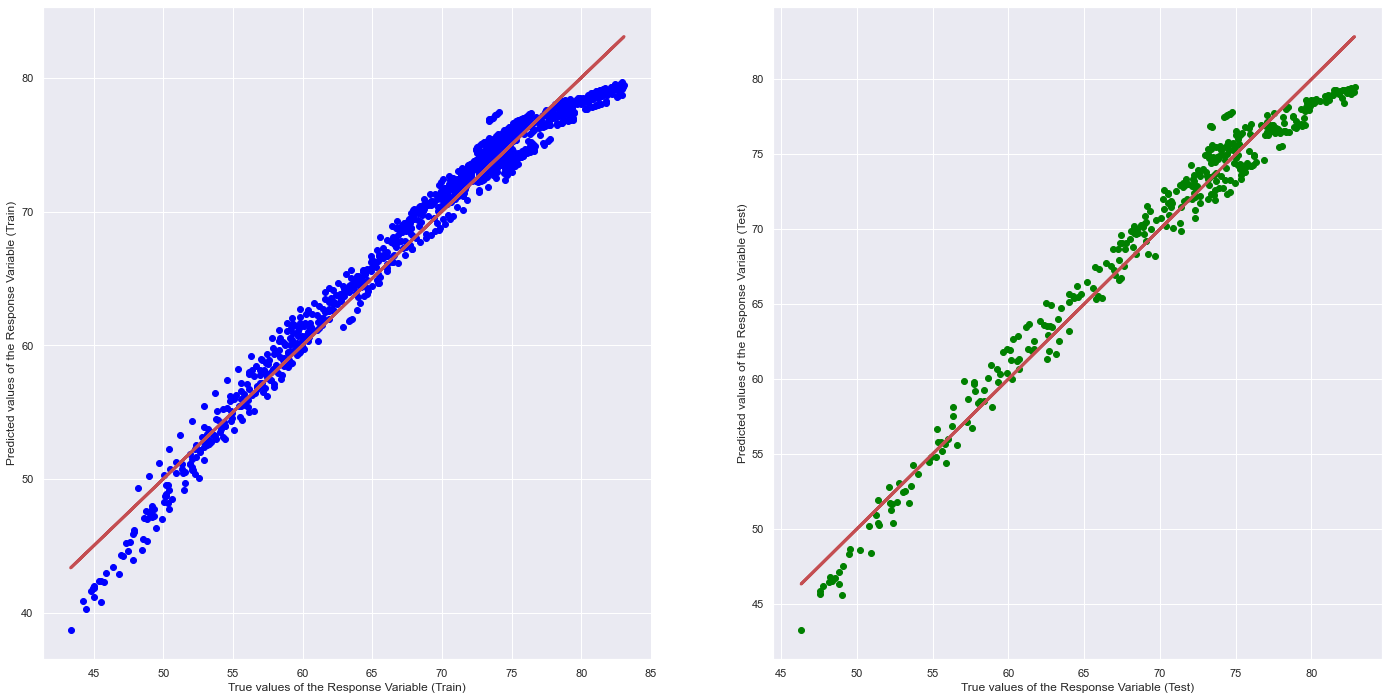

In [149]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [150]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.973450536187826
Mean Squared Error (MSE) 	: 2.2745703349448805

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9709165566671668
Mean Squared Error (MSE) 	: 2.432190144118871



## Model 2: RandomForestRegressor
# ask about getting coefficient of parameters

### Analysing response = life_expect dataset

In [168]:
from sklearn.ensemble import RandomForestRegressor 

estimator = RandomForestRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(100,1001,100),  
              'max_depth': np.arange(2, 11)}   

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le['life_expect'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

RandomForestRegressor(max_depth=9, n_estimators=600, random_state=0)
0.9898239091793753


In [233]:
#using best hyperparameter

rfr = RandomForestRegressor(n_estimators = 600,  max_depth = 9, random_state=0)     

# Fit Random Forest on Train Data
rfr.fit(X_train, y_train_le['life_expect'].ravel())
pd.DataFrame(list(zip(X_train.columns, rfr.score(X_train, y_train_le))), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key = abs)

TypeError: 'numpy.float64' object is not iterable

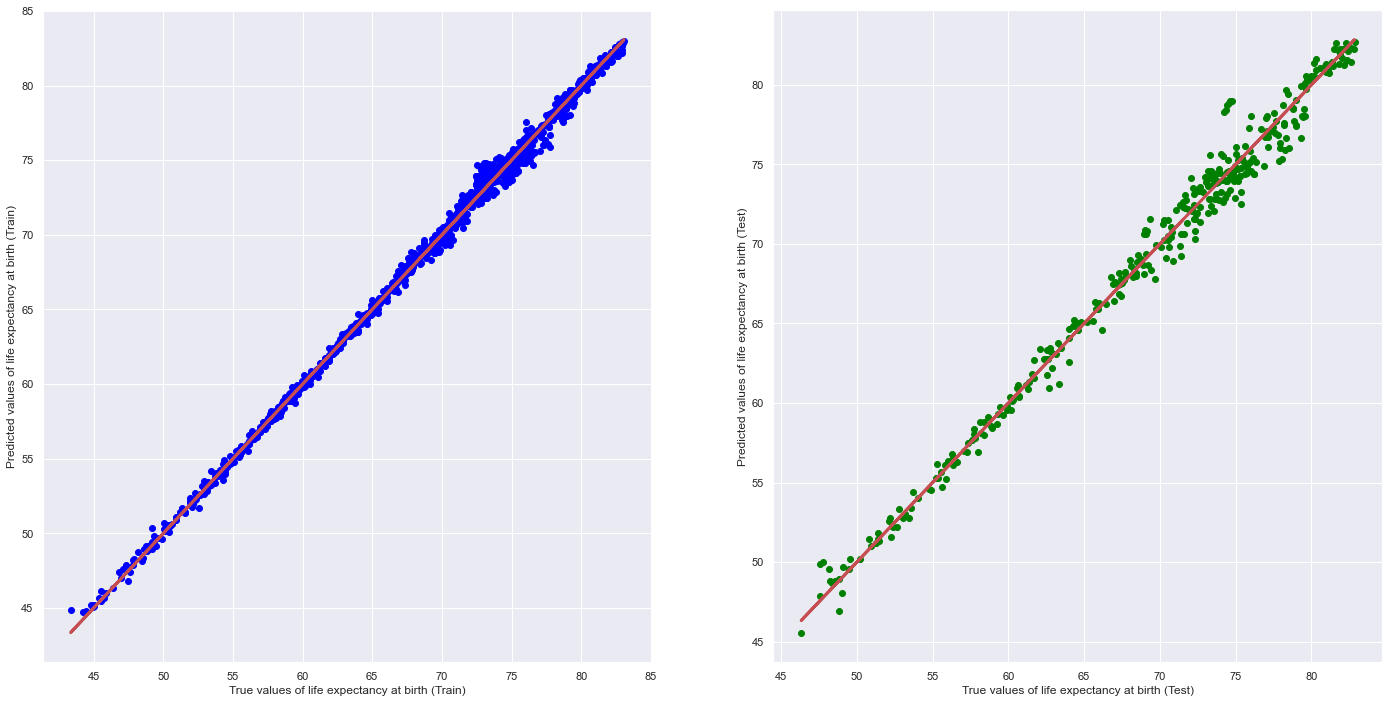

In [189]:
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le, y_train_pred, color = "blue")
axes[0].plot(y_train_le, y_train_le, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at birth (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at birth (Train)")
axes[1].scatter(y_test_le, y_test_pred, color = "green")
axes[1].plot(y_test_le, y_test_le, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at birth (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at birth (Test)")
plt.show()

In [190]:
print("-----------For Response = life_expect-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_train, y_train_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_test, y_test_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le, y_test_pred))
print()

-----------For Response = life_expect-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9973029355907147
Mean Squared Error (MSE) 	: 0.23106540833351727

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9867804724984044
Mean Squared Error (MSE) 	: 1.1055226209405347



### Analysing response = life_exp60 dataset

In [176]:
estimator = RandomForestRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(100,1001,100),  'max_depth': np.arange(2, 11)}   

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le60['life_exp60'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))


RandomForestRegressor(max_depth=8, n_estimators=1000, random_state=0)
0.8449250058081565


In [183]:
rfr = RandomForestRegressor(n_estimators = 1000,  max_depth = 8, random_state=0)     

rfr.fit(X_train, y_train_le60['life_exp60'].ravel())

RandomForestRegressor(max_depth=8, n_estimators=1000, random_state=0)

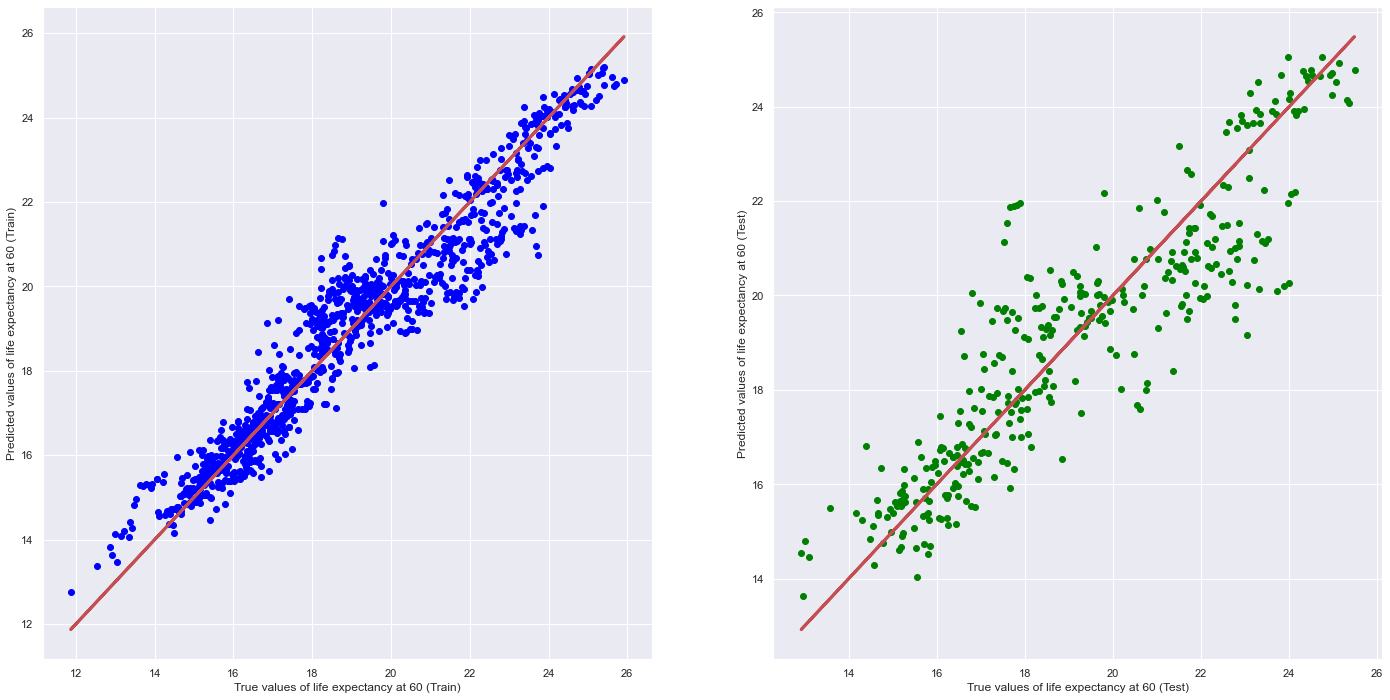

In [184]:
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le60, y_train_pred, color = "blue")
axes[0].plot(y_train_le60, y_train_le60, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at 60 (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at 60 (Train)")
axes[1].scatter(y_test_le60, y_test_pred, color = "green")
axes[1].plot(y_test_le60, y_test_le60, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at 60 (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at 60 (Test)")
plt.show()

In [185]:
print("-----------For Response = life_exp60-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_train, y_train_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le60, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_test, y_test_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le60, y_test_pred))
print()

-----------For Response = life_exp60-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9298971782669916
Mean Squared Error (MSE) 	: 0.5999070635050592

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8122647351880514
Mean Squared Error (MSE) 	: 1.7188883711218537



## Model 3: Gradient Boosting Regressor

### Analysing response = life_expect dataset

In [213]:
from sklearn.ensemble import GradientBoostingRegressor

estimator = GradientBoostingRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(10,100,10),  'max_depth': np.arange(2, 11)}    #check what should be the ideal range of n_estimators

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le['life_expect'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

GradientBoostingRegressor(max_depth=5, n_estimators=70, random_state=0)
0.9892817148446781


In [214]:
gbr = GradientBoostingRegressor(n_estimators = 70,  max_depth = 5, random_state=0)     

gbr.fit(X_train, y_train_le['life_expect'].ravel())

GradientBoostingRegressor(max_depth=5, n_estimators=70, random_state=0)

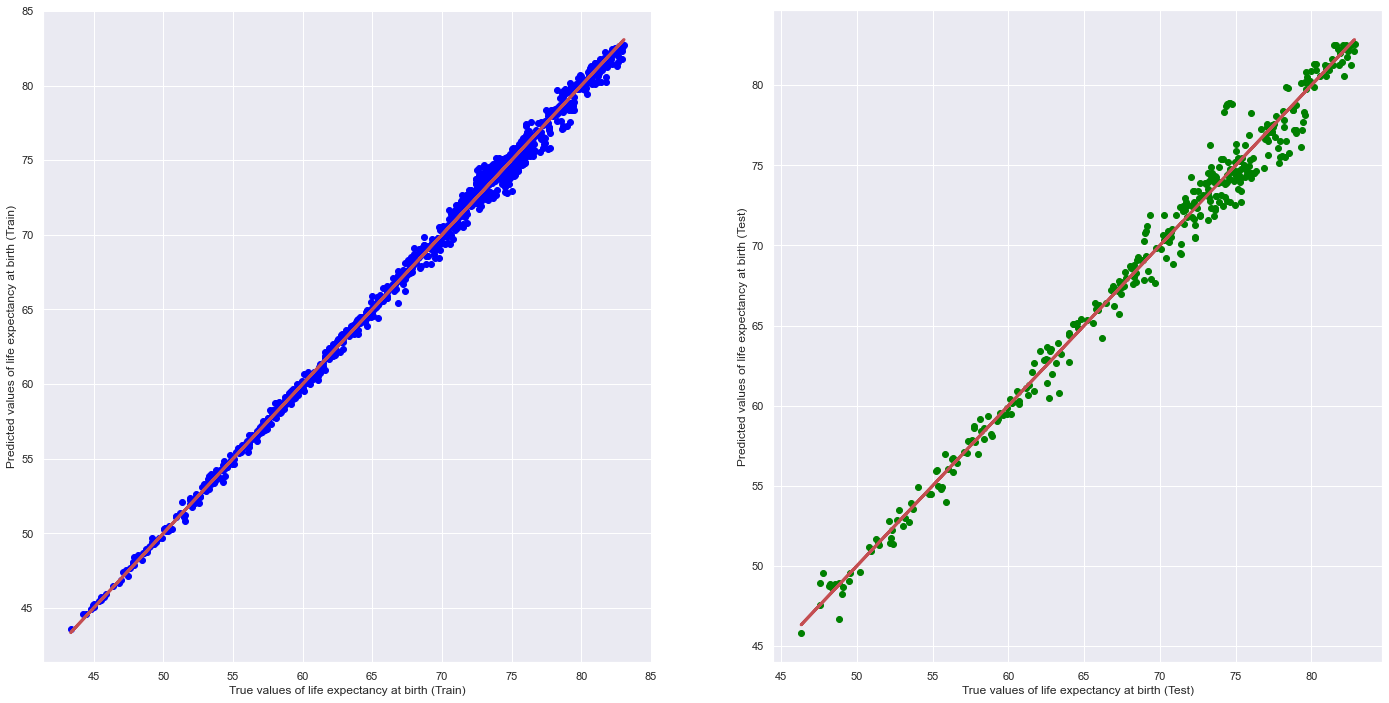

In [215]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le, y_train_pred, color = "blue")
axes[0].plot(y_train_le, y_train_le, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at birth (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at birth (Train)")
axes[1].scatter(y_test_le, y_test_pred, color = "green")
axes[1].plot(y_test_le, y_test_le, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at birth (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at birth (Test)")
plt.show()

In [216]:
print("-----------For Response = life_expect-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_train, y_train_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_test, y_test_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le, y_test_pred))
print()

-----------For Response = life_expect-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9973029355907147
Mean Squared Error (MSE) 	: 0.27856252458033703

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9867804724984044
Mean Squared Error (MSE) 	: 1.2634898232288865



### Analysing response = life_exp60 dataset

In [222]:
estimator = GradientBoostingRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(10,100,10),  'max_depth': np.arange(2, 11)}    #check what should be the ideal range of n_estimators

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le60['life_exp60'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

GradientBoostingRegressor(max_depth=5, n_estimators=30, random_state=0)
0.8343662614787709


In [223]:
gbr = GradientBoostingRegressor(n_estimators = 30,  max_depth = 5, random_state=0)     

gbr.fit(X_train, y_train_le60['life_exp60'].ravel())

GradientBoostingRegressor(max_depth=5, n_estimators=30, random_state=0)

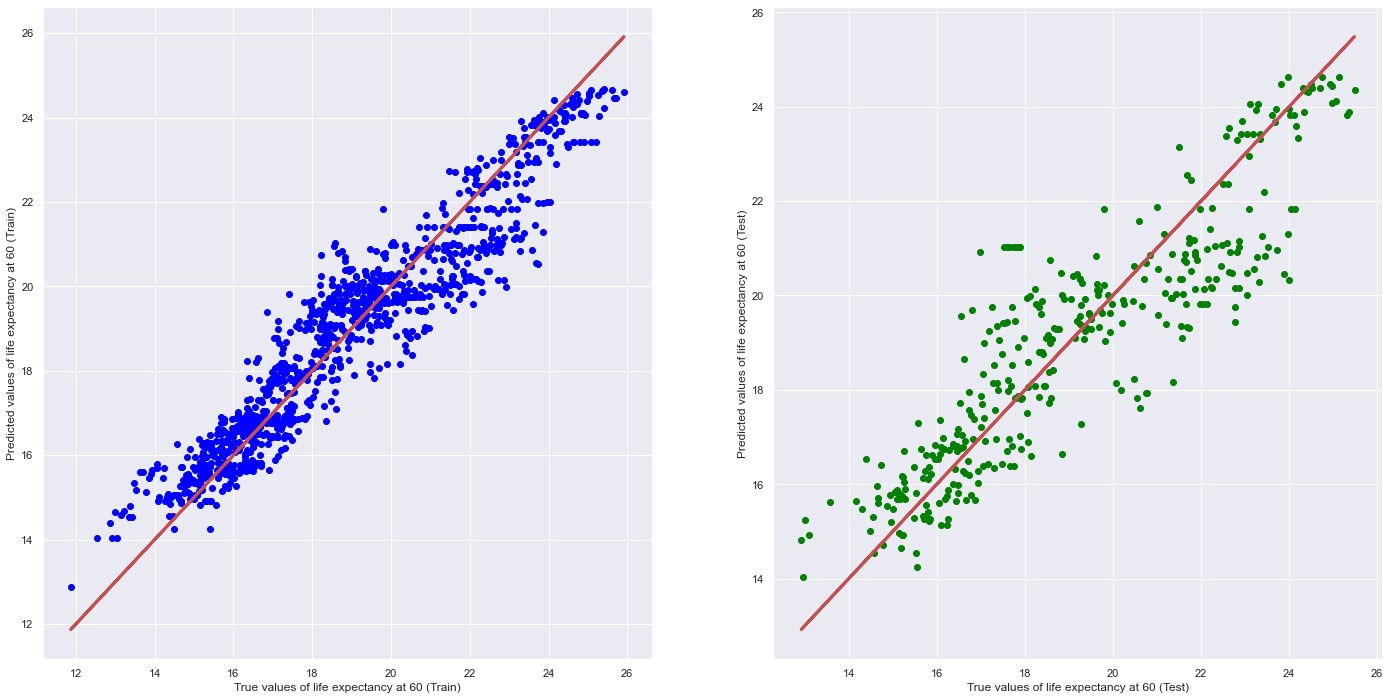

In [224]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le60, y_train_pred, color = "blue")
axes[0].plot(y_train_le60, y_train_le60, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at 60 (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at 60 (Train)")
axes[1].scatter(y_test_le60, y_test_pred, color = "green")
axes[1].plot(y_test_le60, y_test_le60, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at 60 (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at 60 (Test)")
plt.show()

In [225]:
print("-----------For Response = life_exp60-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_train, y_train_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le60, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_test, y_test_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le60, y_test_pred))
print()

-----------For Response = life_exp60-----------
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9050557144292838
Mean Squared Error (MSE) 	: 0.812488658020668

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8046521567981779
Mean Squared Error (MSE) 	: 1.7885885016845076

